# Bagging and Pasting

Bagging and Pasting are two methods which combat over-fitting. In Bagging and Pasting we train a model on a samples of our data selected with or without replacement (respectively) and ensemble the resulting models.

## What we will accomplish

In this notebook we will:
- Discuss bagging and pasting
- Demonstrate how to implement them in `sklearn`.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## With or without replacement

If we recall from our random forest notebook we used bagging to proved each decision tree in a random forest with its own randomly selected data set. This random selection was accomplished by randomly choosing subsets of the training set <b>with</b> replacement.

Both bagging and pasting refer to this process of producing a number of randomly selected subsets of the training data which are in turn used to train the same type of model/algorithm. The key difference between bagging and pasting is whether that sampling is done <b>with</b> or <b>without</b> replacement:

- <i>Bagging</i>: samples <b>with</b> replacement and
- <i>Pasting</i>: samples <b>without</b> replacement.

A way to remember which is which is to remember where the origins of the term bagging. Bagging is short for Bootstrap AGGregatING. When we want to use bagging in `sklearn` we set `bootstrap = True`. So if you want sampling with replacement you want `bootstrap = True`, so you want bagging. Conversely, if you want sampling without replacement you want `bootstrap = False`, so you want pasting.

Bagging/pasting can be applied to any kind of supervised learning algorithm, but the training time of the algorithm does limit how many models you can realistically use in the ensemble.

## In `sklearn`

`sklearn` offers the `BaggingClasifier` to build both pasting and bagging models, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html</a>.

We will demonstrate this with a SVM classifier and some synthetic data.

In [2]:
np.random.seed(4933)

X = np.zeros((200,2))
X[:,0] = np.random.random(200)
X[:,1] = np.random.random(200)

y = np.zeros(200)
y[X[:,0]-X[:,1]>=0.1*np.random.standard_normal(200)] = 1

## to show off our decision boundary later
xx1, xx2 = np.meshgrid(np.arange(-.01, 1.01, .01),
                          np.arange(-.01, 1.01, .01))

X_pred = np.zeros((len(xx1.reshape(-1,1)), 2))
X_pred[:,0] = xx1.flatten()
X_pred[:,1] = xx2.flatten()

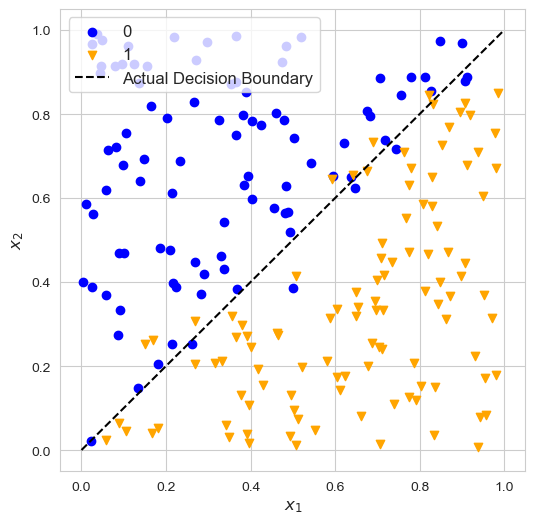

In [3]:
plt.figure(figsize = (6,6))
plt.scatter(X[y == 0,0], 
            X[y == 0,1],
            c='blue',
            label="0")
plt.scatter(X[y == 1,0], 
            X[y == 1,1],
            c='orange',
            marker='v',
            label="1")
plt.plot([0,1],[0,1],'k--',label="Actual Decision Boundary")
plt.xlabel("$x_1$",fontsize = 12)
plt.ylabel("$x_2$",fontsize = 12)
plt.legend(fontsize=12, loc=2)

plt.show()

In [4]:
## Import the model objects here

from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier

In [5]:
# parameters for our SVM.  C and gamma being large means we are likely to overfit, which is what we want for this example.  
# This is done for illustrative purposes only, and is generally not a good choice in practice!
C = 50
gamma= 70
kernel = 'rbf'

# Our single SVC model.
single_model = SVC(C = C, kernel=kernel, gamma = gamma)

# This is bagging since "bootstrap = True".  We are sampling *with* replacement.

bag = BaggingClassifier(estimator = SVC(C = C, kernel=kernel, gamma= gamma),
                           bootstrap = True,
                           n_estimators = 200, # we are making 200 different SVC models
                           max_samples = 0.25)   # each model is trained on 25% of the data.


# This is pasting since "bootstrap = False".  We are sampling *without* replacement.

paste = BaggingClassifier(estimator = SVC(C = C, kernel=kernel, gamma = gamma),
                           bootstrap = False,
                           n_estimators = 200, # we are making 200 different SVC models
                           max_samples = 0.25) # each model is trained on 25% of the data.




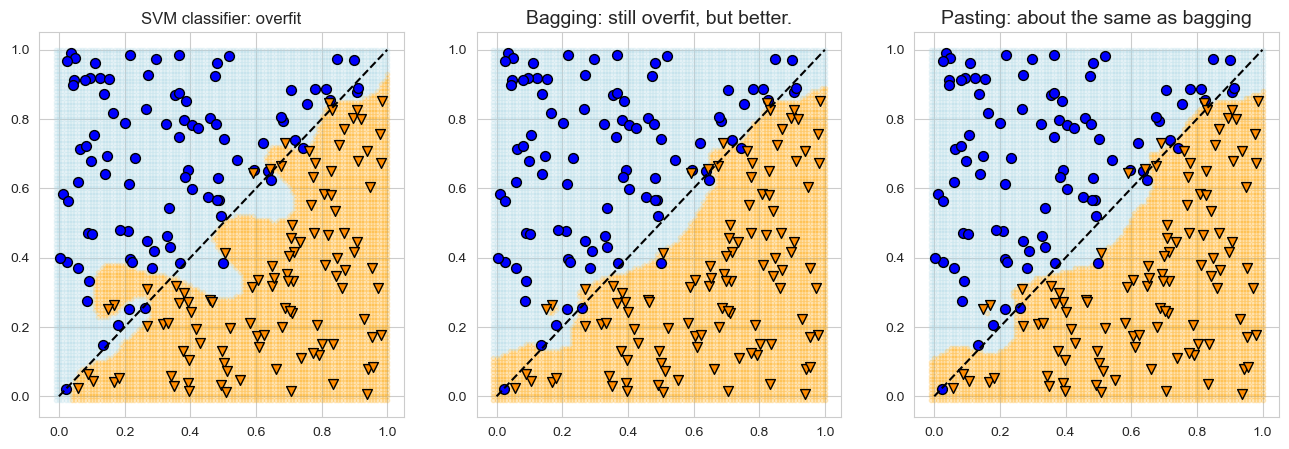

In [6]:
fig,ax = plt.subplots(1,3,figsize=(16,5))

s = 50

## Fit lr
single_model.fit(X,y)
y_pred = single_model.predict(X)

ax[0].set_title("SVM classifier: overfit")

preds = single_model.predict(X_pred)
    


ax[0].scatter(X_pred[preds==1,0],
            X_pred[preds==1,1],
            alpha=.2,
            c='orange',
            s=10)
ax[0].scatter(X_pred[preds==0,0],
            X_pred[preds==0,1],
            alpha=.2,
            c='lightblue',
            s=10)

ax[0].scatter(X[y==0,0], 
            X[y==0,1],
            label='Training 0',
            c = 'blue',
            edgecolor='black',
            s=s)
ax[0].scatter(X[y==1,0], 
            X[y==1,1],
            label='Training 1',
            c = 'darkorange',
            marker = 'v',
            edgecolor='black',
            s=s)
ax[0].plot([0,1],[0,1],'k--')



## Fit Bagged Data
bag.fit(X,y)
y_pred = bag.predict(X)

acc = sum(y == y_pred)/len(y_pred)

ax[1].set_title("Bagging: still overfit, but better.", fontsize=14)

preds = bag.predict(X_pred)
    


ax[1].scatter(X_pred[preds==1,0],
            X_pred[preds==1,1],
            alpha=.2,
            c='orange',
            s=10)
ax[1].scatter(X_pred[preds==0,0],
            X_pred[preds==0,1],
            alpha=.2,
            c='lightblue',
            s=10)

ax[1].scatter(X[y==0,0], 
            X[y==0,1],
            label='Training 0',
            c = 'blue',
            edgecolor='black',
            s=s)

ax[1].scatter(X[y==1,0], 
            X[y==1,1],
            label='Training 1',
            c = 'darkorange',
            marker = 'v',
            edgecolor='black',
            s=s)

ax[1].plot([0,1],[0,1],'k--')




## Fit Paste Data
paste.fit(X,y)
y_pred = paste.predict(X)

acc = sum(y == y_pred)/len(y_pred)

ax[2].set_title("Pasting: about the same as bagging", fontsize=14)

preds = paste.predict(X_pred)
    
ax[2].scatter(X_pred[preds==0,0],
            X_pred[preds==0,1],
            alpha=.2,
            c='lightblue',
            s=10)
ax[2].scatter(X_pred[preds==1,0],
            X_pred[preds==1,1],
            alpha=.2,
            c='orange',
            s=10)
ax[2].scatter(X[y==0,0], 
            X[y==0,1],
            label='Training 0',
            c = 'blue',
            edgecolor='black',
            s=s)

ax[2].scatter(X[y==1,0], 
            X[y==1,1],
            label='Training 1',
            c = 'darkorange',
            marker = 'v',
            edgecolor='black',
            s=s)

ax[2].plot([0,1],[0,1],'k--')

plt.show()


## Why use a bagging/pasting model?

Bagging or pasting introduces bias into the model through the random selection process. This is because the extremes of the data set (which could lead to overfitting in a single model) are not typically selected in the random selection process because they are rare observations. Thinking back to our bias-variance trade-off notebook, this means that bagging or pasting could improve the performance of a single base model by reducing overfitting.

We see that in the plots above!

## Bagging vs. Pasting

In general people tend to using bagging as a default and pasting does not get used as much.

The main reason is because of sample size. In order to be effective, pasting needs a large data set. With smaller data sets the "random" sample tends to be the same across your estimators. If you have a very large data set it may be worth trying pasting as well as bagging and comparing the results.

## Bagging/Pasting regressors

Bagging and pasting can be implemented with regression models as well, where the prediction for a particular value of $X^*$ is the average of all the bagging base model predictions. In `sklearn` it is implemented with `BaggingRegressor` <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html</a>.

Here is an example:

In [7]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

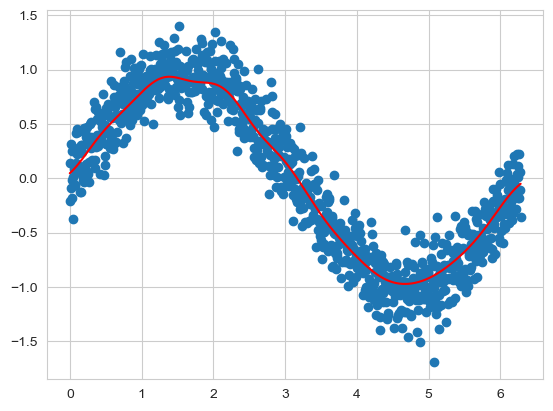

In [18]:
np.random.seed(216)
X = np.linspace(0,2*np.pi, 1000).reshape(-1,1)
y = (np.sin(X) + 0.2*np.random.normal(size = X.shape)).reshape(-1)

regr = BaggingRegressor(estimator = SVR(gamma= 5),n_estimators=100, max_samples= 0.05, random_state=216)  # try 1 and 100 estimators
regr.fit(X,y.reshape(-1))

plt.scatter(X,y)
plt.plot(X,regr.predict(X), color = 'red')
plt.show()

### A look "under the hood"

Let's implement our own simple bagging regressor class to see what is going on under the hood.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
class CustomBaggingRegressor():
    def __init__(self, estimator, kwargs = {}, n_estimators = 10, max_samples=0.1):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.estimators = [estimator(**kwargs) for i in range(n_estimators)]
    def fit(self, X, y):
        for estimator in self.estimators:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-self.max_samples)
            estimator.fit(X_train, y_train)
    def predict(self, X):
        preds = np.zeros(X.shape[0])
        for estimator in self.estimators:
            preds += estimator.predict(X)
        preds = preds/self.n_estimators
        return preds

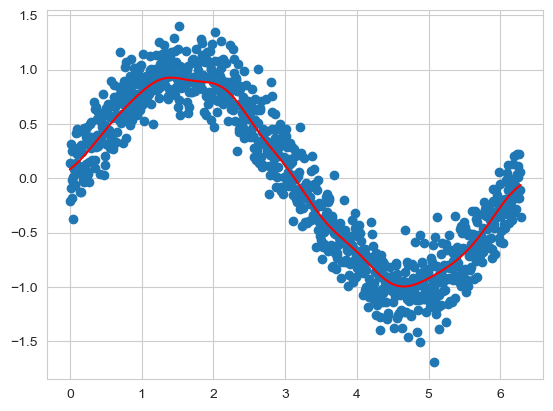

In [17]:
regr = CustomBaggingRegressor(estimator = SVR, kwargs={'gamma':5} ,n_estimators=100, max_samples= 0.05)  # try 1 and 100 estimators
regr.fit(X,y.reshape(-1))

plt.scatter(X,y)
plt.plot(X,regr.predict(X), color = 'red')
plt.show()

## Reference

Here is a reference on bagging/pasting.

<a href = "https://link.springer.com/content/pdf/10.1007/BF00058655.pdf">Bagging Predictors</a> by Leo Breiman

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)